In [103]:
from IPython.display import IFrame, Image, display, YouTubeVideo
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns  # Makes for nicer plots
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 5, 4
import pysal as ps
import seaborn as sns

## Final Project: Markov Chains and Census Tracts ##

  ## Introduction ##
  
  I am currently working on an honors thesis where I will be looking at the health of elderly Mexican Americans in 5 different states in the Southwest: Texas, Colorado, New Mexico, Arizona and California. Researchers have found that Mexican Americans have better health than Whites and African Americans of their same socio-economic status (Franzini, Ribble, & Keddie, 2001). Furthermore, this phenomenon is strongest in neighborhoods where a high percentage of the residents are Hispanic (Cagney, Browning, & Wallace, 2007). This example of positive health outcomes that result from living in neighborhoods with your same ethnic group is sometimes referred to as the “barrio advantage” (Eschbach, Ostir, Patel, Markides, & Goodwin, 2004). What I would like to discover is whether neighborhood type influences the “barrio advantage.” Most studies on the barrio advantage were done in highly urban areas like Chicago and Los Angeles (Cagney et al., 2007; Lee & Ferraro, 2007). Therefore, I would like to see if a barrio advantage still exists in very isolated rural areas where neighbors might live farther apart, or where living conditions might be very precarious, which is typical of rural border communities (Mier et al., 2008). This research will contribute to our understanding of urban vs rural health disparities, and additionally, it will help us better understand the Hispanic Health Paradox and its implications. 
   
   Using the tools and methods I learned in Spatio-Temporal analysis, I will use the census tract data I have and compare different metrics over time. I will look at how percent Hispanic has changed over time, in order to visualize the demographic changes taking place that could affect the barrio advantage. I will also look at how percent of households with plumbing and electricity has changed over time in order to see if certain census tracts that I predict to be mostly border colonias, or unregulated settlements that lack basic infrastructure, have changed. 
   
   I will use Markov Chains to visualize how the states of these census tracts have changed over a 5 year period from 2010-2015.


In [50]:
df = pd.read_csv('PercentHispanic4.csv', encoding = "ISO-8859-1")
df.head()

,Census_Tract,Geography,2010,2011,2012,2013,2014,2015
0,4003000600,"Census Tract 6, Cochise County, Arizona",63.9,63.1,70.8,76.7,75.9,77.0
1,4013061300,"Census Tract 613, Maricopa County, Arizona",63.6,60.5,55.8,49.9,53.9,56.2
2,4013071909,"Census Tract 719.09, Maricopa County, Arizona",16.5,18.5,18.7,22.5,26.4,32.2
3,4013111501,"Census Tract 1115.01, Maricopa County, Arizona",81.7,88.9,86.6,88.1,89.8,90.0
4,4013320002,"Census Tract 3200.02, Maricopa County, Arizona",69.4,68.4,67.0,61.5,62.7,57.9


* Now let's slice and subset the data

In [51]:
pci = df.ix[:, "2010":].T  # The 'T' means transpose...
pci.shape

(6, 306)

* We can see the percent Hispanic in 2010 for all census tracts in 2010 in the array below

In [52]:
pci.ix[0, :].values 

array([  63.9,   63.6,   16.5,   81.7,   69.4,   76. ,   92. ,   71. ,
         70.5,   57.4,   27.3,   79.7,   90. ,   56. ,   72.9,   55.2,
         31.5,   68.7,   76.2,   52.2,   88.3,   58.6,   78.6,   78.2,
         73.8,   61.6,   78.5,   90.4,   34.9,   90.1,   85. ,   95.5,
         65.7,   79. ,   67.5,   89.2,   44.9,   13.6,   53.5,   96. ,
         83.8,   95.7,   94.5,   93.1,   74.6,   85.8,   76.6,   74.6,
         91.1,   37.6,   41.5,   34.8,   37.7,   89.4,   90.8,   84.2,
         46.6,   62. ,   95.7,  100. ,   92.1,   98.8,  100. ,   79.3,
        100. ,   97.9,   75. ,   57.4,   75.8,   90.4,   27.2,   84.8,
         77.6,   88.8,   93.3,   42.7,   88.7,   85.9,   89.5,   93.2,
         97.2,   90.9,   81.2,   87.9,   52.1,   80.8,   59.7,   78.5,
         40.5,   38. ,   48. ,   84.9,   93.7,   98.2,   37.9,   57.3,
         32.2,   57. ,   43.2,   47.4,   86.8,   49.2,   30.4,   89.8,
         71.9,   96.6,   52.8,   70.8,   81.4,   87.9,   66.4,   38. ,
      

Side note: In case it wasn't already clear, the census tracts from my data are census tracts with a high percentage of Hispancis. When selecting the census tracts to choose blocks from for the study, the Principal Investigators selected from a groupd of census tracts that all together house about 60% of the elderly Mexican American population in the United States. Then, from those census tracts the ones with the highest percentages of elderly Mexican Americans were selected. This was to ensure that the randomly sampled census tracts were likely to have at least some elderly Mexican American residents. The data collected for this study was collected in 8 different waves. The census tract data that I have is only for Wave 5. Wave 5 was completed in 2005, more than ten years after the first Wave in 1994. In this fifth wave, around a thousand new subjects were added to the survey because the researchers wanted to incorporate a more highly educated cohort into the study. The original cohort from Waves 1-4 has a mean years of education of 5.1 years. This new cohort has a mean years of education of 7.08 years (Markides, Ray, Angel & Espino, 2009). 

Although the vast majority of the census tracts will have relatively high percent Hispanic numbers, I think it will be interesting to see if the percent Hispanic has changed over the years in order to be able to compare that to changes in heath outcomes over those years. 

* A next step will be to discretize the steps of the Markov transition. I will categorize the different percentages of Hispanics in each census tract into quantiles. Let's see how this comes out since they are all high percentages!

In [54]:
q5 = np.array([ps.Quantiles(y).yb for y in pci.values]).T
q5.shape
q5[:, 0]  #incomes into quartiles per year

array([1, 1, 0, 2, 1, 2, 3, 1, 1, 1, 0, 2, 3, 1, 1, 1, 0, 1, 2, 0, 3, 1, 2,
       2, 1, 1, 2, 3, 0, 3, 2, 4, 1, 2, 1, 3, 0, 0, 0, 4, 2, 4, 3, 3, 2, 2,
       2, 2, 3, 0, 0, 0, 0, 3, 3, 2, 0, 1, 4, 4, 3, 4, 4, 2, 4, 4, 2, 1, 2,
       3, 0, 2, 2, 3, 3, 0, 3, 3, 3, 3, 4, 3, 2, 3, 0, 2, 1, 2, 0, 0, 0, 2,
       3, 4, 0, 1, 0, 1, 0, 0, 3, 0, 0, 3, 1, 4, 0, 1, 2, 3, 1, 0, 0, 0, 1,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 2, 3, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 4, 2, 1, 1, 3, 2,
       1, 4, 3, 3, 2, 3, 3, 4, 4, 3, 4, 4, 4, 4, 3, 2, 4, 3, 2, 2, 3, 0, 2,
       4, 0, 0, 0, 0, 2, 3, 2, 2, 3, 2, 4, 2, 3, 2, 3, 4, 0, 0, 2, 0, 3, 1,
       2, 3, 3, 0, 2, 3, 4, 3, 2, 4, 4, 3, 4, 4, 4, 4, 3, 1, 4, 4, 4, 4, 3,
       4, 4, 4, 4, 3, 1, 2, 1, 2, 2, 0, 1, 0, 0, 1, 1, 4, 4, 2, 0, 4, 1, 4,
       2, 3, 4, 2, 1, 4, 4, 4, 2, 3, 4, 3, 1, 1, 0, 3, 4, 3, 4, 1, 3, 1, 0,
       1, 4, 4, 4, 4, 0, 2, 1, 1, 0, 0, 3, 1, 2, 4, 4, 2, 1, 4, 4, 4, 3, 4,
       3, 4,

The first census tracts are in Arizona, the last ones are in Texas. You can kind of see that there might be a pattern where more census tracts in Texas are in the higher quantiles than the ones in Arizona. There are about 6 million more Hispanics in Texas, because there is more of everything in Texas, but the Percent Hispanic in Texas (32%) is relatively similar to the Percent Hispanic in Arizona (26). This made me think, maybe Texas is more segregated than Arizona? It would be interesting to find out... In my search to find out I came accross this interesting article by our favorite pollster Nate Silver: http://fivethirtyeight.com/features/the-most-diverse-cities-are-often-the-most-segregated/. Which led me to Brown University's American Community Project and the University of Michigan's Population Studies Center Racial Residential Segregation Measurement Project (it would be interesting to see how the length of university center names have changed over time).

These projects measure residential segregation using a dissimilarity index which measures the "eveness" of the distribution of two groups over a geographic area. A dissimilarity index of O means the two races being compared are perfectly distributed whereas a higher number like 60 means that 60 percent of either of the racial groups would have to move to a different census tract in order to make the distribution be even (Pop. Studies Center UMich, n.d.). 

The cities in Arizona have dissimilarity indices that range from 11 to 38 whereas Texas ranges from 10 to 49 (CensusScope, 2002). Colorado's range from 16-34, California's from 7-44. California has some of the most spatially integrated cities in the nation, 5 of the top 10 most integrated cities are in California (1.Irvine, 2.Sacramento, 4.Stockton, 5.Fremont, 6.Chula Vista) (Silver, 2015). In New Mexico the values range from 13 to 33 (CensusScope, 2002). 

Here are the images for some of the areas where the census tract data is from:
<img src="Sacramento.png">
<img src="Cali.png">
<img src="Texas.png">
<img src="LA.png">



* Here is an even cooler map that a professional made: an interactive [Dot Map of racial residency patterns](http://demographics.coopercenter.org/DotMap/)

* Now let's get back to the data and tidy it up to allow for better viewing.

In [55]:
tidy = pd.melt(df, id_vars=["Census_Tract", "Geography"],
               var_name="Year", value_name="Percent_Hispanic")
tidy.head()

,Census_Tract,Geography,Year,Percent_Hispanic
0,4003000600,"Census Tract 6, Cochise County, Arizona",2010,63.9
1,4013061300,"Census Tract 613, Maricopa County, Arizona",2010,63.6
2,4013071909,"Census Tract 719.09, Maricopa County, Arizona",2010,16.5
3,4013111501,"Census Tract 1115.01, Maricopa County, Arizona",2010,81.7
4,4013320002,"Census Tract 3200.02, Maricopa County, Arizona",2010,69.4


In [56]:
#add 1 because its easy to talk about it that way
tidy["Group"] = q5.T.flatten() + 1
tidy.head()

,Census_Tract,Geography,Year,Percent_Hispanic,Group
0,4003000600,"Census Tract 6, Cochise County, Arizona",2010,63.9,2
1,4013061300,"Census Tract 613, Maricopa County, Arizona",2010,63.6,2
2,4013071909,"Census Tract 719.09, Maricopa County, Arizona",2010,16.5,1
3,4013111501,"Census Tract 1115.01, Maricopa County, Arizona",2010,81.7,3
4,4013320002,"Census Tract 3200.02, Maricopa County, Arizona",2010,69.4,2


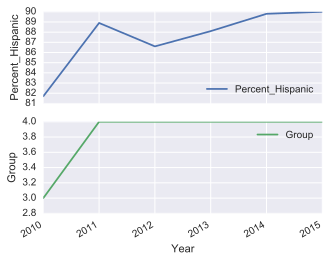

In [57]:
hispanic = tidy[tidy.Geography == "Census Tract 1115.01, Maricopa County, Arizona"].set_index("Year")
ax1, ax2 = hispanic[["Percent_Hispanic", "Group"]].plot(subplots=True)
ax1.set_ylabel("Percent_Hispanic")
ax2.set_ylabel("Group")
plt.show()

This census tract started out with 82% Hispanic and by 2015 it was 90% Hispanic. It was always in the two highest quantiles, 3 and 4. 

Let's look at a census tract in Denver! 

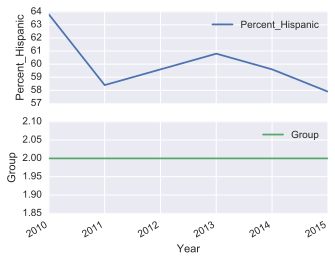

In [58]:
hispanic = tidy[tidy.Geography == "Census Tract 2.01, Denver County, Colorado"].set_index("Year")
ax1, ax2 = hispanic[["Percent_Hispanic", "Group"]].plot(subplots=True)
ax1.set_ylabel("Percent_Hispanic")
ax2.set_ylabel("Group")
plt.show()

This is proof that gentrification is real. Not really, but this decline in percent Hispanic could be due to the influx of non-hispanic Whites to the Denver area in recent years (Hubbard, 2009). Let's see what other Denver census tracts look like.
Here is a map I made of the census tracts that were selected in Denver. Two of them are in the newly hip Highland neighborhood:
<img src="Denver.png">

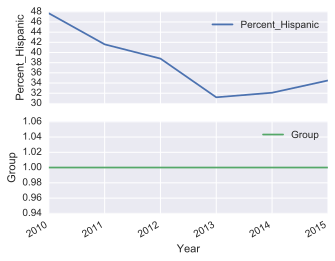

In [59]:
hispanic = tidy[tidy.Geography == "Census Tract 11.02, Denver County, Colorado"].set_index("Year")
ax1, ax2 = hispanic[["Percent_Hispanic", "Group"]].plot(subplots=True)
ax1.set_ylabel("Percent_Hispanic")
ax2.set_ylabel("Group")
plt.show()

Again, the percentage fell, and in this case more substantially, yet the group number did not change. 

The Hispanic Health Paradox is a paradox because about a third of Hispanics (27%) in the US live in poverty, similar to African Americans (27%) but different than Whites (10%) (Census, 2013). Socio-Economic Status (SES) has been determined as a fundamental cause of disease, therefore, it is paradoxical that Hispanics have better health than both Whites, who are less poor, but also African Americans who are just as poor, (Link & Phelan, 1995).

So let's see if the percent in poverty of the census tracts are similarly as high as percent Hispanic.

In [60]:
df = pd.read_csv('poverty2.csv', encoding = "ISO-8859-1")
df.head()

,Census_Tract,Geography,2010,2011,2012,2013,2014,2015
0,4003000600,"Census Tract 6, Cochise County, Arizona",26.7,21.7,34.8,28.8,34.5,33.6
1,4013061300,"Census Tract 613, Maricopa County, Arizona",26.9,17.2,14.8,18.1,23.3,21.9
2,4013071909,"Census Tract 719.09, Maricopa County, Arizona",11.2,9.3,12.6,12.0,11.4,10.0
3,4013111501,"Census Tract 1115.01, Maricopa County, Arizona",45.9,42.6,41.9,51.5,51.2,49.6
4,4013320002,"Census Tract 3200.02, Maricopa County, Arizona",32.9,36.2,31.3,31.2,27.2,24.8


In [61]:
pci = df.ix[:, "2010":].T  # The 'T' means transpose...
pci.shape

(6, 306)

In [62]:
pci.ix[0, :].values 

array([ 26.7,  26.9,  11.2,  45.9,  32.9,  21.6,  22.7,  28.6,  15.4,
        11.9,  25.8,  34.1,  44.1,  50. ,  28.4,  32.8,  15.3,  11.6,
        30.8,  11. ,  34.8,  13.7,  41.1,  39.3,  52.7,  43. ,  24.9,
        49.7,   4.8,  32.6,  38.4,  34.1,   2.2,  36.6,  13.4,  14.7,
         4.5,   5.9,  13.4,  43.5,  20.6,  38.6,  33.5,  37.1,  21.8,
        18.7,  21.1,  14.2,  14.8,   8.8,   8.2,  14.5,  10.2,   5.4,
        18.6,   9.5,   3.2,   5.9,  26.5,  17.9,  28.6,  22.7,  14.2,
        33.1,  11.1,  13.6,  20.6,  10.6,  22.4,  29.2,  28.9,  35.3,
        38.2,  23.1,  19.1,   5.3,  20.7,  12.2,  23.7,  14. ,  17.4,
        22.8,  22.2,  39.4,  27. ,  21.3,  15.7,  28.6,  17.7,  16.3,
        11.2,  24.4,  31.2,  32.4,  18.4,  23.1,  26.8,  34.4,   9.4,
         4.6,  17.9,  23.6,  23.4,  28. ,  20.7,  39.8,   7.3,  34.4,
        30.4,  13.3,  28.6,  33.1,  16. ,   7.1,  19.6,  11.6,  25.8,
        10.4,  22.8,  15.2,  15.9,  23.3,  12.8,   2.4,   4. ,  17.8,
        13.8,   7.3,

In [63]:
q5 = np.array([ps.Quantiles(y).yb for y in pci.values]).T
q5.shape
q5[:, 0]  #incomes into quartiles per year

array([2, 2, 0, 4, 3, 1, 2, 2, 1, 0, 2, 3, 4, 4, 2, 3, 1, 0, 3, 0, 3, 1, 4,
       4, 4, 4, 2, 4, 0, 3, 4, 3, 0, 4, 0, 1, 0, 0, 0, 4, 1, 4, 3, 4, 2, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2, 1, 3, 0, 0, 1, 0, 2,
       3, 3, 3, 4, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2, 4, 2, 1, 1, 2, 1, 1, 0, 2,
       3, 3, 1, 2, 2, 3, 0, 0, 1, 2, 2, 2, 1, 4, 0, 3, 3, 0, 2, 3, 1, 0, 1,
       0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 3, 3, 0, 2, 0, 2, 0, 0,
       3, 1, 0, 2, 3, 3, 2, 0, 1, 3, 0, 0, 3, 1, 0, 3, 2, 4, 4, 4, 1, 1, 0,
       1, 1, 2, 2, 4, 2, 0, 2, 3, 3, 3, 1, 3, 4, 2, 4, 3, 4, 2, 3, 1, 0, 1,
       1, 1, 0, 1, 2, 3, 3, 2, 4, 3, 4, 4, 3, 0, 2, 4, 4, 1, 0, 2, 0, 3, 3,
       4, 4, 3, 0, 1, 4, 3, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 1, 3, 4, 3, 2, 4,
       3, 4, 3, 3, 3, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0, 4, 2, 2, 1, 0, 4, 0, 4,
       1, 4, 4, 3, 1, 4, 4, 2, 0, 4, 3, 3, 2, 1, 2, 2, 4, 3, 3, 4, 2, 1, 2,
       1, 3, 4, 2, 4, 1, 2, 3, 1, 0, 1, 3, 0, 3, 4, 3, 2, 2, 4, 3, 4, 4, 3,
       3, 3,

In [64]:
tidy = pd.melt(df, id_vars=["Census_Tract", "Geography"],
               var_name="Year", value_name="Percent_Poverty")
tidy.head()

,Census_Tract,Geography,Year,Percent_Poverty
0,4003000600,"Census Tract 6, Cochise County, Arizona",2010,26.7
1,4013061300,"Census Tract 613, Maricopa County, Arizona",2010,26.9
2,4013071909,"Census Tract 719.09, Maricopa County, Arizona",2010,11.2
3,4013111501,"Census Tract 1115.01, Maricopa County, Arizona",2010,45.9
4,4013320002,"Census Tract 3200.02, Maricopa County, Arizona",2010,32.9


In [65]:
#add 1 because its easy to talk about it that way
tidy["Group"] = q5.T.flatten() + 1
tidy.head()

,Census_Tract,Geography,Year,Percent_Poverty,Group
0,4003000600,"Census Tract 6, Cochise County, Arizona",2010,26.7,3
1,4013061300,"Census Tract 613, Maricopa County, Arizona",2010,26.9,3
2,4013071909,"Census Tract 719.09, Maricopa County, Arizona",2010,11.2,1
3,4013111501,"Census Tract 1115.01, Maricopa County, Arizona",2010,45.9,5
4,4013320002,"Census Tract 3200.02, Maricopa County, Arizona",2010,32.9,4


Let's analyze some of the same counties, and some other ones. 

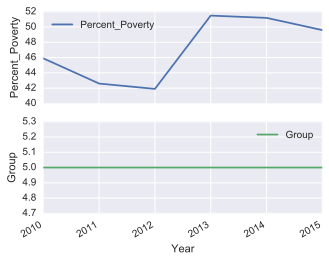

In [66]:
hispanic = tidy[tidy.Geography == "Census Tract 1115.01, Maricopa County, Arizona"].set_index("Year")
ax1, ax2 = hispanic[["Percent_Poverty", "Group"]].plot(subplots=True)
ax1.set_ylabel("Percent_Poverty")
ax2.set_ylabel("Group")
plt.show()

This county was in quantile 4 above in percent Hispanic and here it is in the highest quantile for percent living in Poverty. Let's looks at a census tract that was in quantil 5 for Percent Hispanic.

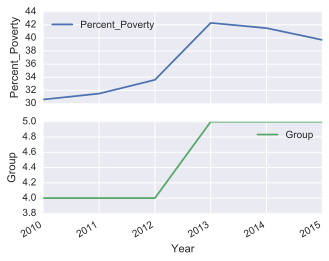

In [67]:
hispanic = tidy[tidy.Geography == "Census Tract 17.06, Webb County, Texas"].set_index("Year")
ax1, ax2 = hispanic[["Percent_Poverty", "Group"]].plot(subplots=True)
ax1.set_ylabel("Percent_Poverty")
ax2.set_ylabel("Group")
plt.show()

Here the percent poverty when up and so did the group number. 

Let's look at a census tract in Denver.

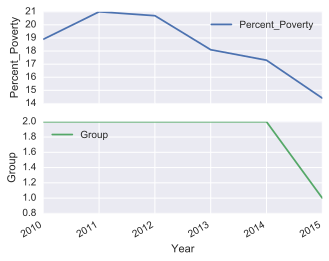

In [68]:
hispanic = tidy[tidy.Geography == "Census Tract 11.02, Denver County, Colorado"].set_index("Year")
ax1, ax2 = hispanic[["Percent_Poverty", "Group"]].plot(subplots=True)
ax1.set_ylabel("Percent_Poverty")
ax2.set_ylabel("Group")
plt.show()

This was a census tract that was in the lowest quantile of percent Hispanic and saw the percentage shrink even more over the 5 years. It is interesting that during this same 5 year period, percent in poverty also went down. Could they be related? It's not enough information to tell if this particular census tract's poverty lowered just because of the decrease in percent hispanic but we do know that census tracts with higher percent hispanics are poorer (Escbach, 2004). I will attempt to visualize this later. 

But first!! Let's see what the Markov Objects look like with this data:

In [70]:
m5 = ps.Markov(q5)
m5.transitions

array([[ 266.,   44.,    0.,    0.,    0.],
       [  44.,  195.,   65.,    2.,    0.],
       [   1.,   64.,  173.,   66.,    2.],
       [   0.,    1.,   68.,  183.,   53.],
       [   0.,    0.,    1.,   54.,  248.]])

## First order Markov ##

In [71]:
m5.p

matrix([[ 0.85806452,  0.14193548,  0.        ,  0.        ,  0.        ],
        [ 0.14379085,  0.6372549 ,  0.2124183 ,  0.00653595,  0.        ],
        [ 0.00326797,  0.20915033,  0.56535948,  0.21568627,  0.00653595],
        [ 0.        ,  0.00327869,  0.22295082,  0.6       ,  0.17377049],
        [ 0.        ,  0.        ,  0.00330033,  0.17821782,  0.81848185]])

It is always most likely that the census tract will stay in its same quantile and not transition. Also, it is slightly more likely that a census tract that is in the 5 quantile move down to the 3rd then one in the 1st quantile to move up to the 3rd.

## Steady State ##

In [72]:
m5.steady_state

matrix([[ 0.20451565],
        [ 0.19732412],
        [ 0.20031518],
        [ 0.19957533],
        [ 0.19826972]])

 Now lets determine *transition times* between the states. How long does it take for a less poor census tract to become more poor? We already saw that it isn't very likely to get poorer, it is more likely to just stay the same or get richer.

In [73]:
ps.ergodic.fmpt(m5.p).round(4) 

array([[  4.8896,   7.0455,  16.4982,  29.0308,  50.311 ],
       [ 27.404 ,   5.0678,   9.4528,  21.9853,  43.2656],
       [ 40.5844,  13.7026,   4.9921,  13.1849,  34.4414],
       [ 48.9288,  22.0395,   8.6679,   5.0106,  22.0515],
       [ 54.2862,  27.397 ,  14.0193,   5.7488,   5.0436]])

Let's graph Poverty and Percent Hispanic to actually see, not just guess, if there is a relationship with Percent Hispanic and Poverty in this data...

In [109]:
df = pd.read_csv('povertyhispanic.csv', encoding = "ISO-8859-1")
df.head()
df.columns =['Census_Tract','Geography','Percent_Hispanic2010','Percent_Hispanic2011','Percent_Hispanic2012','Percent_Hispanic2013','Percent_Hispanic2014','Percent_Hispanic2015', 'Percent_Poverty2010', 'Percent_Poverty2011', 'Percent_Poverty2012', 'Percent_Poverty2013', 'Percent_Poverty2014', 'Percent_Poverty2015']

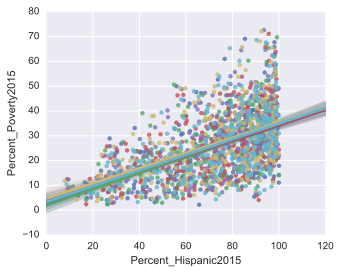

In [110]:
sns.regplot(x="Percent_Hispanic2010", y="Percent_Poverty2010", data=df)
sns.regplot(x="Percent_Hispanic2011", y="Percent_Poverty2011", data=df)
sns.regplot(x="Percent_Hispanic2012", y="Percent_Poverty2012", data=df)
sns.regplot(x="Percent_Hispanic2013", y="Percent_Poverty2013", data=df)
sns.regplot(x="Percent_Hispanic2014", y="Percent_Poverty2014", data=df)
sns.regplot(x="Percent_Hispanic2015", y="Percent_Poverty2015", data=df)

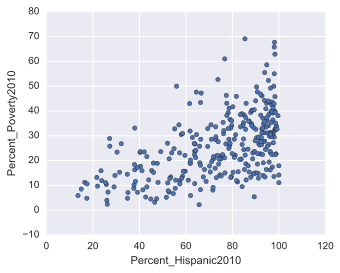

In [102]:
df.plot(x="Percent_Hispanic2010", y="Percent_Poverty2010",kind='scatter')


References: 

Cagney, K. A., Browning, C. R., & Wallace, D. M. (2007). The Latino paradox in neighborhood context: the case of asthma and other respiratory conditions. American Journal of Public Health, 97(5), 919–25. https://doi.org/10.2105/AJPH.2005.071472

United States Census Bureau (February, 2013). Poverty Rates for Selected Detailed Race and Hispanic Groups by State and Place: 2007–2011. Retreived December 12, 2016, from http://www.census.gov/prod/2013pubs/acsbr11-17.pdf 

Eschbach, K., Ostir, G. V, Patel, K. V, Markides, K. S., & Goodwin, J. S. (2004). Neighborhood context and mortality among older Mexican Americans: is there a barrio advantage? American Journal of Public Health, 94(10), 1807–12. Retrieved from http://www.ncbi.nlm.nih.gov/pubmed/15451754

Franzini, L., Ribble, J. C., & Keddie, A. M. (2001). Understanding the Hispanic paradox. Ethnicity & Disease, 11(3), 496–518. Retrieved from http://www.ncbi.nlm.nih.gov/pubmed/11572416

Hubbard, B. (2016, May 06). Denver gets whiter; suburbs more diverse. Retrieved December 13, 2016, from http://www.denverpost.com/2009/03/28/denver-gets-whiter-suburbs-more-diverse/

Lee, M.-A., & Ferraro, K. F. (2007). Neighborhood Residential Segregation and Physical Health among Hispanic Americans: Good, Bad, or Benign? Journal of Health and Social Behavior, 48(2), 131–148. https://doi.org/10.1177/002214650704800203

Link, B. G., & Phelan, J. (1995). Social Conditions As Fundamental Causes of Disease. Journal of Health and Social Behavior, 35, 80. https://doi.org/10.2307/2626958

Markides, K. S., Ray, L.A., Angel, R. & Espino, D.R. Hispanic Established Populations for the Epidemiologic Study of the Elderly (HEPESE) Wave 5, 2004-2005 [Arizona, California, Colorado, New Mexico, and Texas]. ICPSR25041-v1. Ann Arbor, MI: Inter-university Consortium for Political and Social Research [distributor], 2009-09-23.
http://doi.org/10.3886/ICPSR25041.v1

Mier, N., Ory, M. G., Zhan, D., Conkling, M., Sharkey, J. R., & Burdine, J. N. (2008). Health-related quality of life among Mexican Americans living in colonias at the Texas–Mexico border. Social Science & Medicine, 66(8), 1760–1771. https://doi.org/10.1016/j.socscimed.2007.12.017

Population Studies Center University of Michigan. (n.d.)Racial Residential Segregation. Retrieved December 13, 2016, from http://enceladus.icpsr.umich.edu/race/seg.html

Silver, N. (2015, May 1). The Most Diverse Cities Are Often The Most Segregated. Retrieved December 13, 2016, from http://fivethirtyeight.com/features/the-most-diverse-cities-are-often-the-most-segregated/

